# Analyzing supernova light curves

### Explore the file

In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import matplotlib
from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = (10.0, 8.0)

/home/kyle/.conda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

In [3]:
from scipy.optimize import fmin

In [5]:
# open the file
hdulist = fits.open("data/sndata.fits")

In [6]:
sne = np.asarray(hdulist[2].data)

In [7]:
z = sne["z"].astype(np.float64)
mb = sne["mb.S2"].astype(np.float64)
mb_err = sne["e_mb.S2"].astype(np.float64)
c = sne["c.S2"].astype(np.float64)
x1 = sne["x1.S2"].astype(np.float64)

In [8]:
def plot_sn_data(z, mb, mb_err, cosmo=None):
    plt.errorbar(z, mb, yerr=mb_err, ls='none', color='0.2', marker='o', ms=1.)
    if cosmo is not None:
        zarr = np.linspace(0.05, 1.2, 200)
        mb_predict = cosmo.distmod(zarr).value - 19.3
        plt.plot(zarr, mb_predict, c="r")
    plt.xlabel("redshift")
    plt.ylabel("mB")

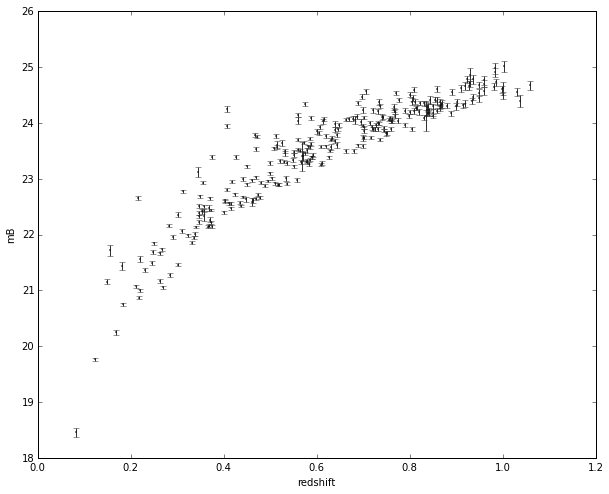

In [9]:
plot_sn_data(z, mb, mb_err)

In [11]:
# correct mb
mb_corr = mb - 2.3 * c + 0.128 * x1

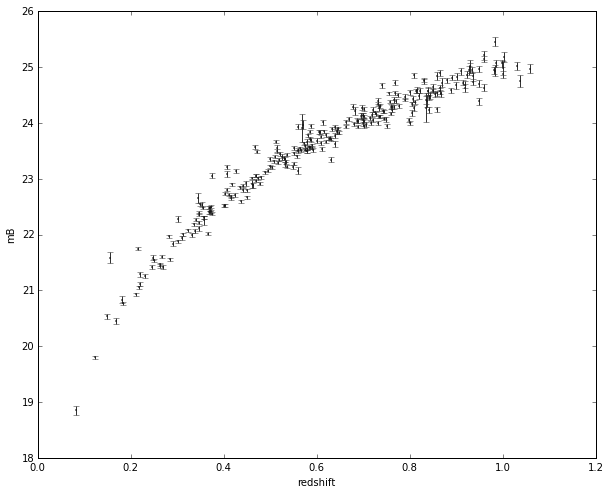

In [13]:
plot_sn_data(z, mb_corr, mb_err)

In [19]:
cosmo = FlatLambdaCDM(H0=50., Om0=1.0)

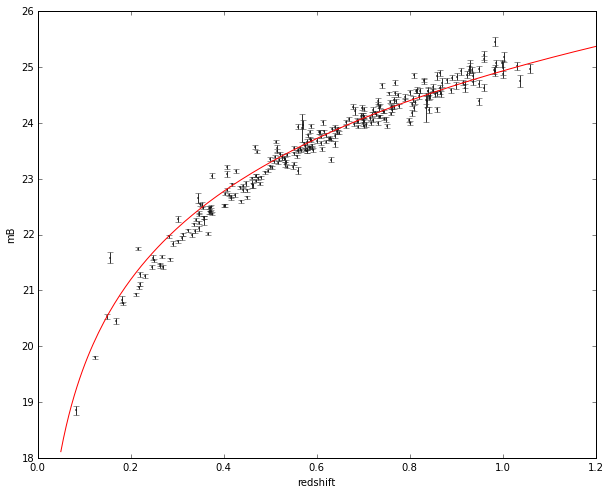

In [20]:
plot_sn_data(z, mb_corr, mb_err, cosmo=cosmo)